#Hands-on Activity 11.1 Linear Regression Analysis
Submitted by: Dela Cruz, Eugene D.G.

Submitted to: Engr. Roman Richard

Import/download libraries and load dataset

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
!pip install scikit-learn

#Data wrangling/cleaning

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe(include='all')

Country         Year      Status  Life expectancy   \
count          2938  2938.000000        2938       2928.000000   
unique          193          NaN           2               NaN   
top     Afghanistan          NaN  Developing               NaN   
freq             16          NaN        2426               NaN   
mean            NaN  2007.518720         NaN         69.224932   
std             NaN     4.613841         NaN          9.523867   
min             NaN  2000.000000         NaN         36.300000   
25%             NaN  2004.000000         NaN         63.100000   
50%             NaN  2008.000000         NaN         72.100000   
75%             NaN  2012.000000         NaN         75.700000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          NaN                     NaN   
top                 NaN            NaN          NaN                     NaN   
freq                NaN            NaN          NaN                     NaN   
mean         164.796448      30.303948     4.602861              738.251295   
std          124.292079     117.926501     4.052413             1987.914858   
min            1.000000       0.000000     0.010000                0.000000   
25%           74.000000       0.000000     0.877500                4.685343   
50%          144.000000       3.000000     3.755000               64.912906   
75%          228.000000      22.000000     7.702500              441.534144   
max          723.000000    1800.000000    17.870000            19479.911610   

        Hepatitis B       Measles   ...        Polio  Total expenditure  \
count   2385.000000    2938.000000  ...  2919.000000         2712.00000   
unique          NaN            NaN  ...          NaN                NaN   
top             NaN            NaN  ...          NaN                NaN   
freq            NaN            NaN  ...          NaN                NaN   
mean      80.940461    2419.592240  ...    82.550188            5.93819   
std       25.070016   11467.272489  ...    23.428046            2.49832   
min        1.000000       0.000000  ...     3.000000            0.37000   
25%       77.000000       0.000000  ...    78.000000            4.26000   
50%       92.000000      17.000000  ...    93.000000            5.75500   
75%       97.000000     360.250000  ...    97.000000            7.49250   
max       99.000000  212183.000000  ...    99.000000           17.60000   

        Diphtheria      HIV/AIDS            GDP    Population  \
count   2919.000000  2938.000000    2490.000000  2.286000e+03   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean      82.324084     1.742103    7483.158469  1.275338e+07   
std       23.716912     5.077785   14270.169342  6.101210e+07   
min        2.000000     0.100000       1.681350  3.400000e+01   
25%       78.000000     0.100000     463.935626  1.957932e+05   
50%       93.000000     0.100000    1766.947595  1.386542e+06   
75%       97.000000     0.800000    5910.806335  7.420359e+06   
max       99.000000    50.600000  119172.741800  1.293859e+09   

         thinness  1-19 years   thinness 5-9 years  \
count             2904.000000          2904.000000   
unique                    NaN                  NaN   
top                       NaN                  NaN   
freq                      NaN                  NaN   
mean                 4.839704             4.870317   
std                  4.420195             4.508882   
min                  0.100000             0.100000   
25%                  1.600000             1.500000   
50%                  3.300000             3.300000   
75%                  7.200000             7.2000

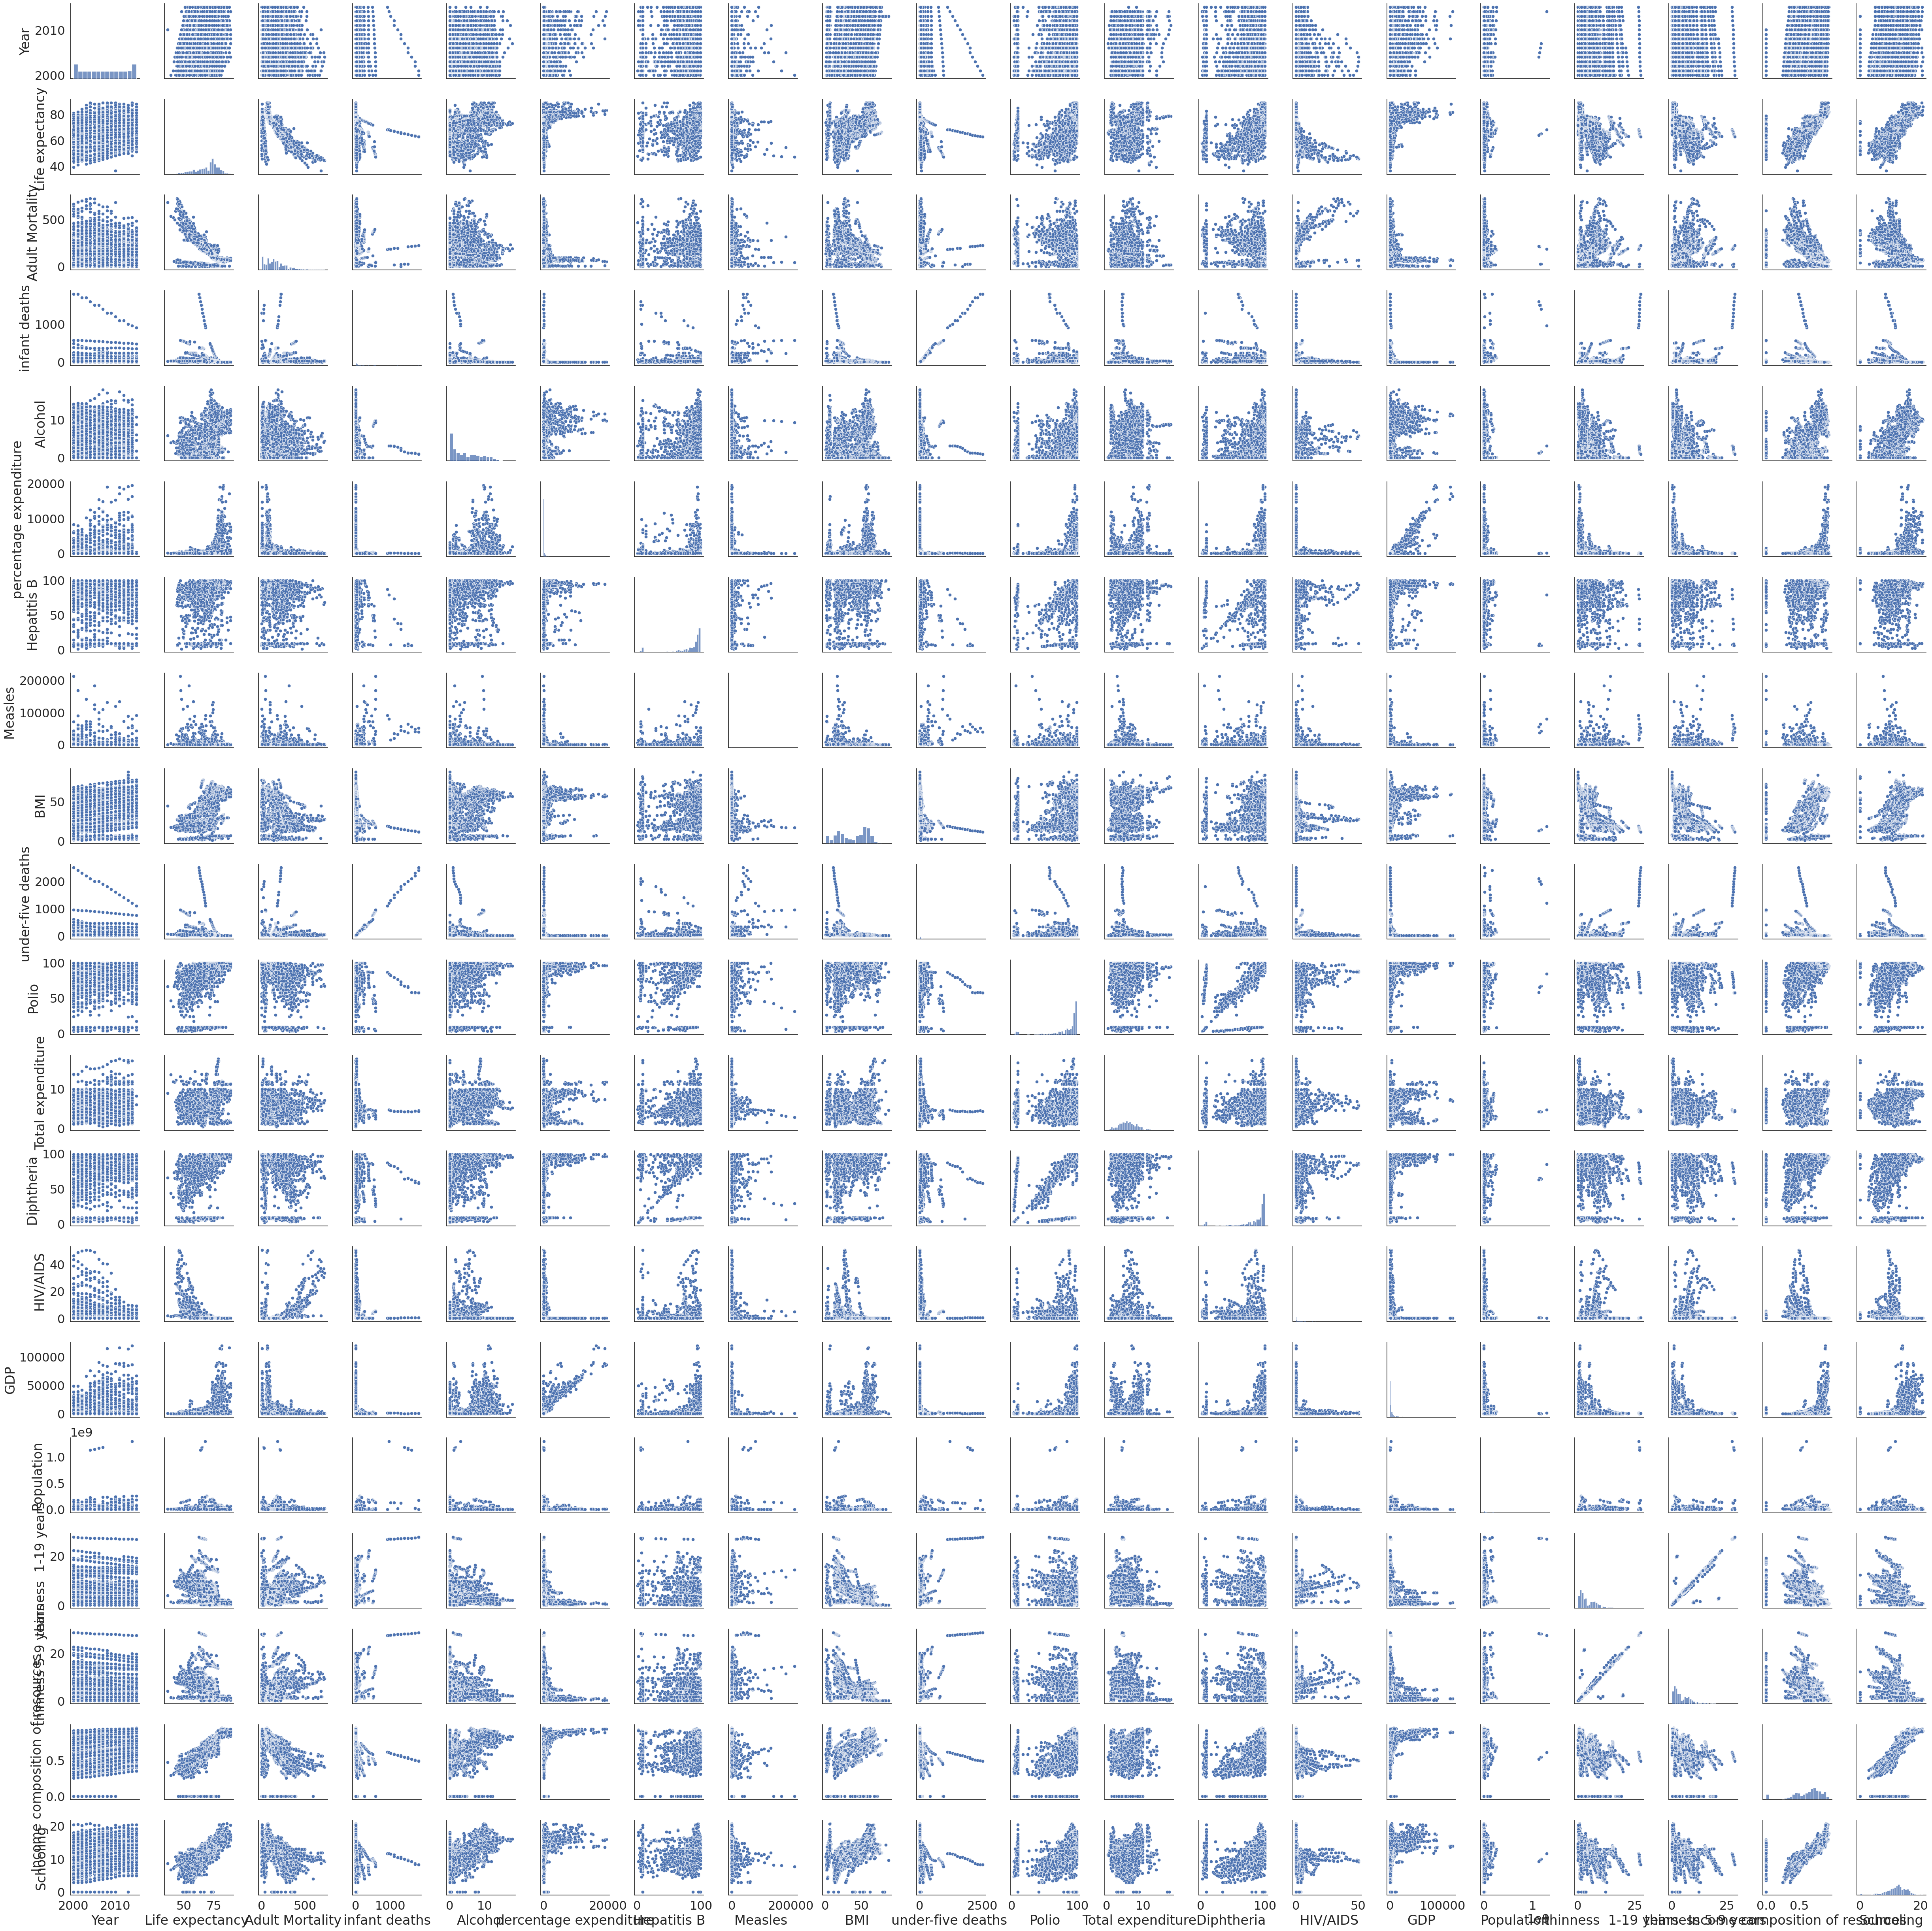

In [22]:
sns.pairplot(df)

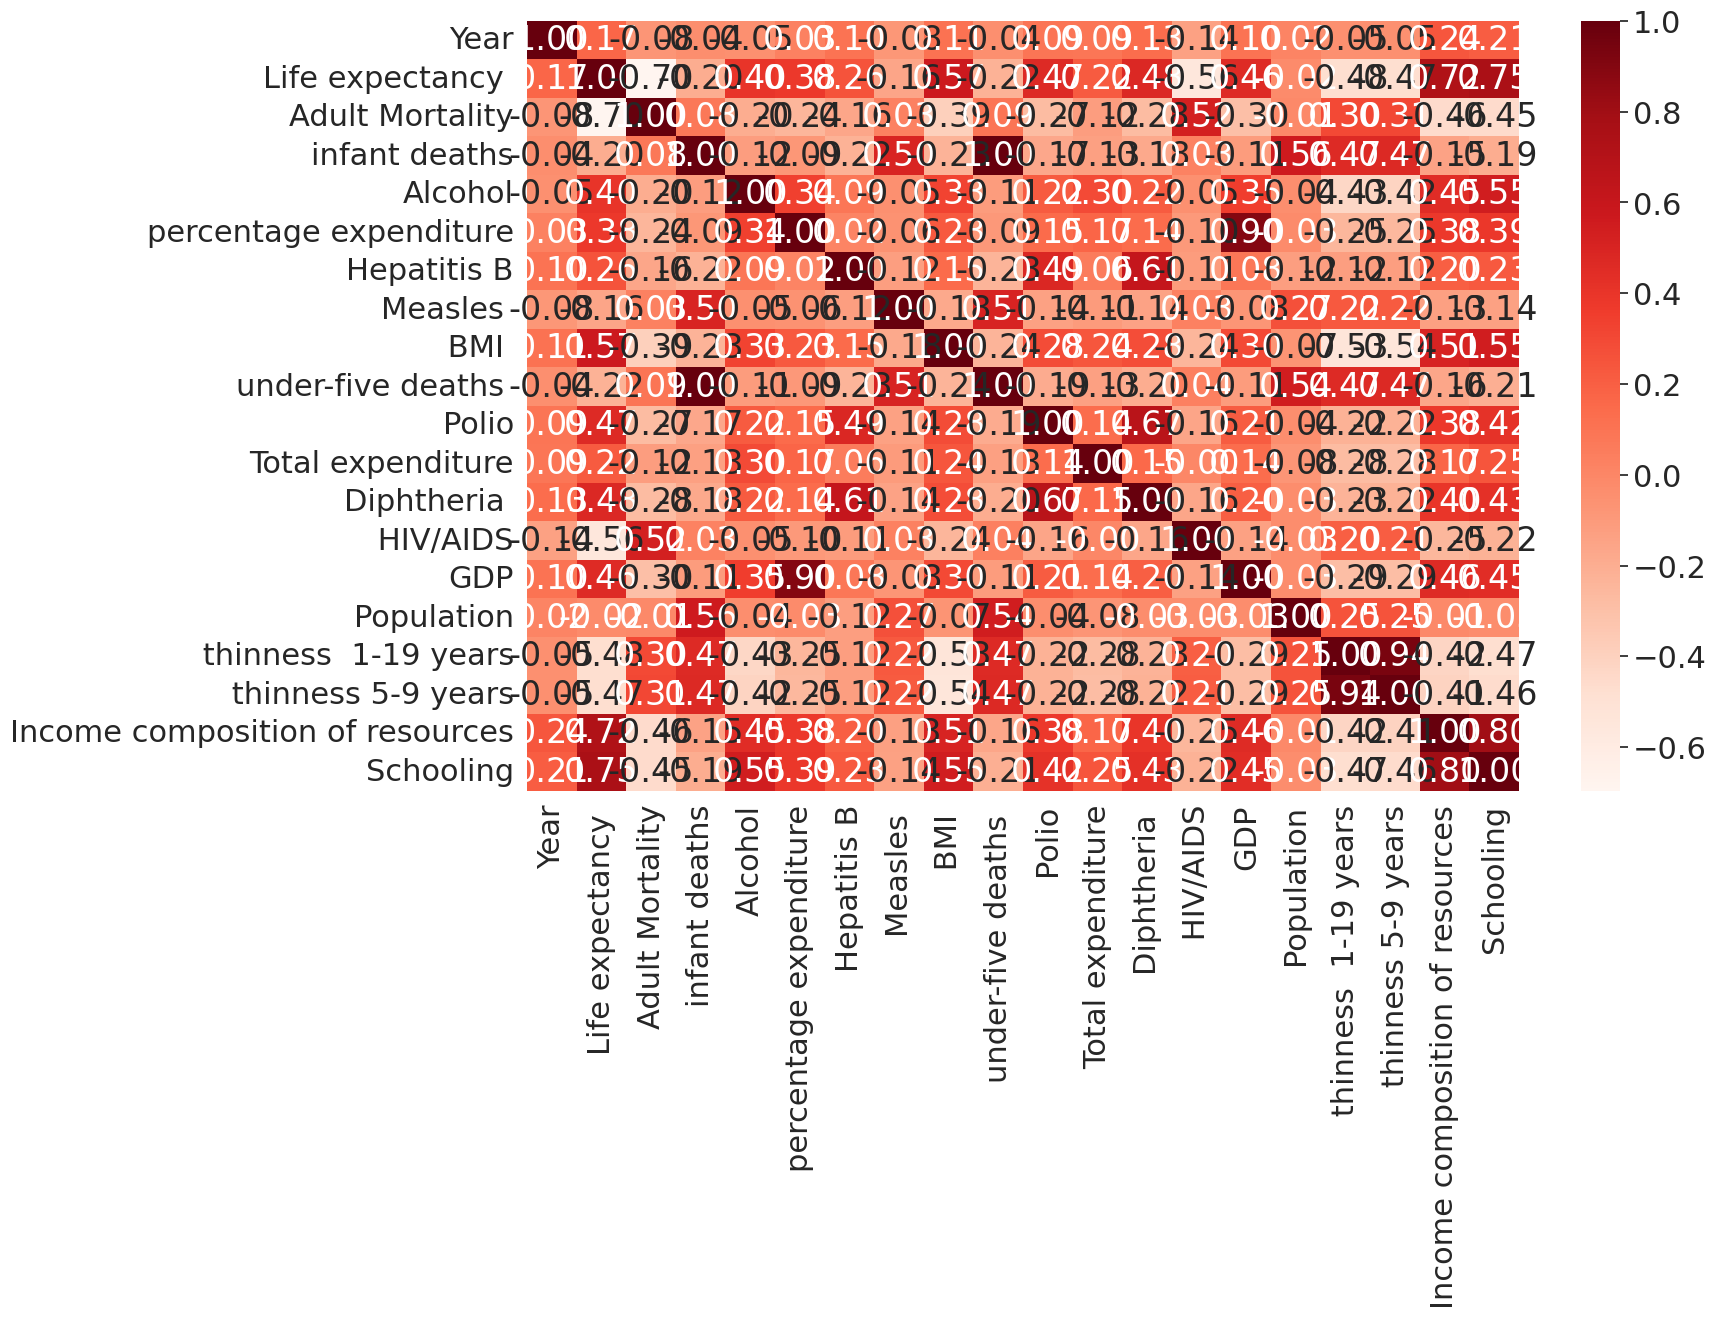

In [21]:
numval = df.select_dtypes(include=[np.number])

correlation_matrix = numval.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.show()

In [24]:
numval = numval.dropna() #remove missing values

In [29]:
numval.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria               

#Training

In [30]:
numval

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
2933  2004              44.3            723.0             27     4.36   
2934  2003              44.5            715.0             26     4.06   
2935  2002              44.8             73.0             25     4.43   
2936  2001              45.3            686.0             25     1.72   
2937  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                    

In [41]:
X = numval.drop('infant deaths',axis=1)
y = numval['infant deaths']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [43]:
X_train.shape

(1154, 19)

In [44]:
y_train.shape

(1154,)

In [45]:
X_test.shape

(495, 19)

In [46]:
y_test.shape

(495,)

#Linear Regression

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

#Evaluation

In [49]:
MC = model.coef_

In [50]:
pd.DataFrame(MC, X.columns, columns=['Coefficients'])

Coefficients
Year                            -1.143588e-01
Life expectancy                  4.699094e-01
Adult Mortality                 -8.910728e-04
Alcohol                         -5.618026e-01
percentage expenditure          -1.466678e-04
Hepatitis B                      1.108800e-02
Measles                          2.712676e-04
 BMI                            -9.306181e-03
under-five deaths                7.033567e-01
Polio                            2.039183e-02
Total expenditure               -1.114730e-01
Diphtheria                       2.822234e-02
 HIV/AIDS                        2.005750e-01
GDP                             -8.976582e-06
Population                       5.567986e-08
 thinness  1-19 years            3.031496e-02
 thinness 5-9 years              1.682059e-01
Income composition of resources  1.810060e+00
Schooling                       -1.887552e-01

#Prediction for Model

In [51]:
y_pred = model.predict(X_test)

In [53]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [54]:
MAE

4.10039656169458

In [55]:
MSE

80.82112730395033

In [56]:
RMSE

8.990057135744484

In [57]:
df['infant deaths'].mean()

30.303948264125257

#Residual Histogram

In [58]:
test_resid = y_test - y_pred

In [59]:
pd.DataFrame({'Error Values' : (test_resid)}).hvplot.kde()

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Distribution   [Error Values]   (Density)

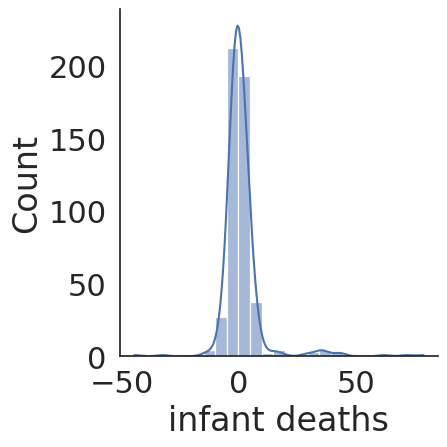

In [61]:
sns.displot(test_resid, bins=25, kde=True)

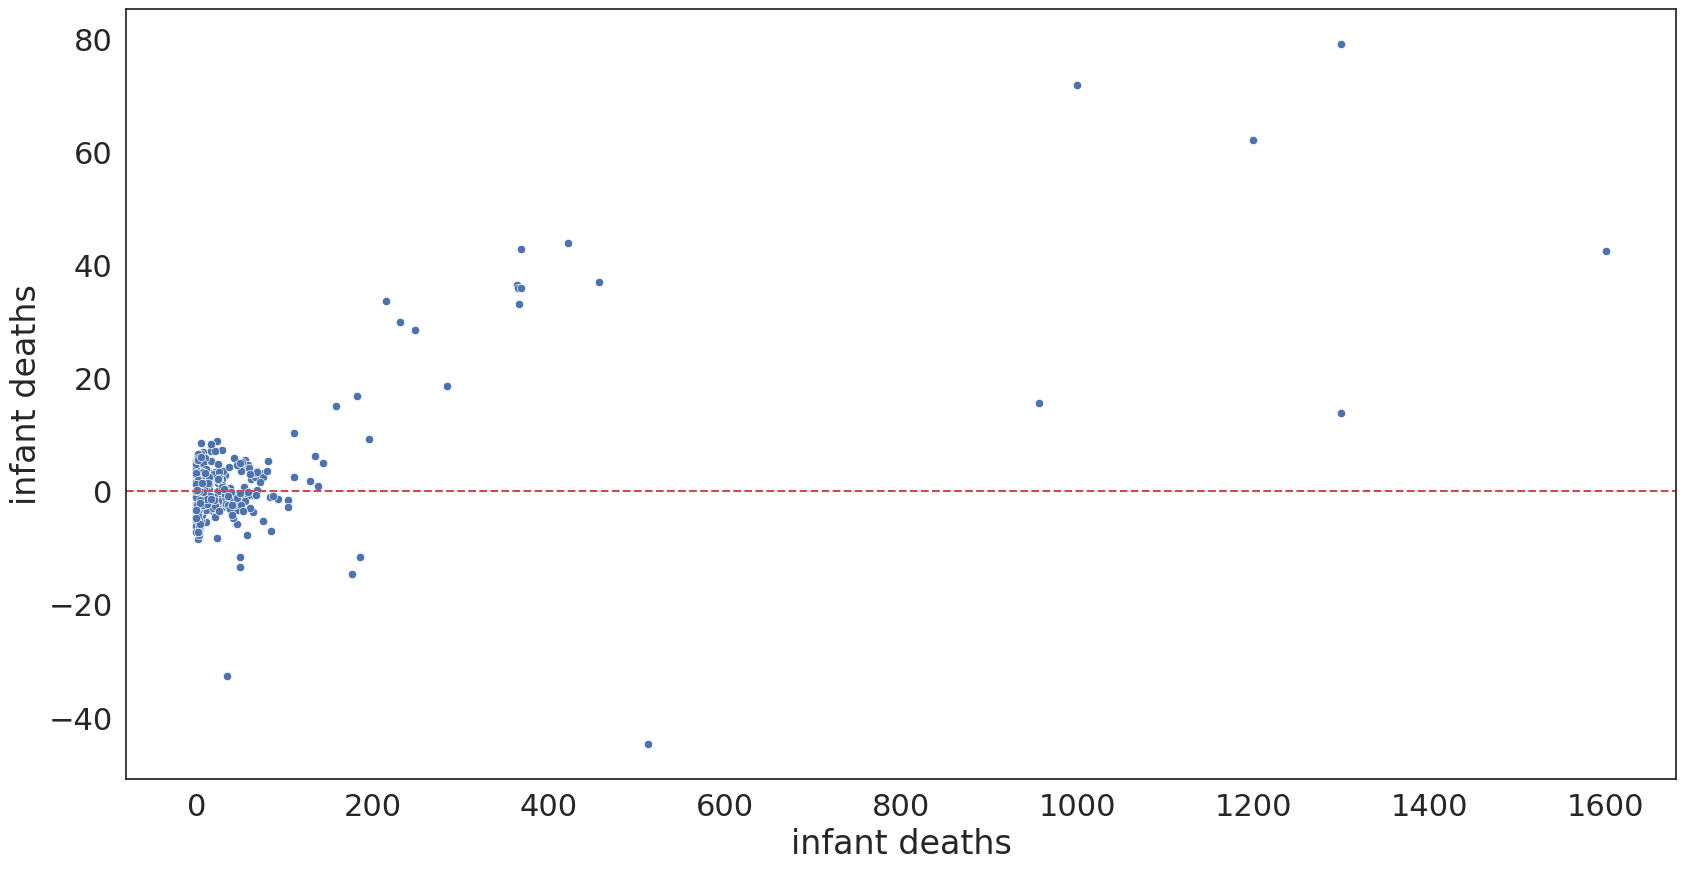

In [63]:
sns.scatterplot(x=y_test, y=test_resid)

plt.axhline(y=0, color='r', ls='--')